In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

alg = pd.read_csv('/Users/barnalikkapradhan/Downloads/Algerian.csv', header = 1)
alg

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
#to strip all the columns from the dataset
alg.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [4]:
#one can see gaps in the column, so that has to be removed
alg.columns = [i.strip() for i in alg.columns] 
alg.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [5]:
# axis =0 remove rows. axis = 1 removes columns
#as can be seen below that rows 122, 123 has been removed from the dataset as they contained name of the 
#region and repitition of the name of columns
alg.drop([122,123], axis = 0, inplace= True)
alg[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [6]:
alg.shape

(244, 14)

In [7]:
#dropped column classes
alg.drop(['Classes'], axis = 1,inplace = True)
alg

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [8]:
#to extract the date and convert dtype from object to datetime if needed.
alg['Date'] = pd.to_datetime(alg[['day','month','year']])
alg.drop(['day', 'month', 'year'], axis=1, inplace=True)
alg

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,2012-09-26
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,2012-09-27
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,2012-09-28
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,2012-09-29


In [9]:
# add Regions
# for loc :first part is for rows, second part for columns
# ":" indicates from 0 to the specified no, "," indicates specific nos with 3 AND 6 -> alg.iloc[0:7,[3,6]]
alg.loc[0:122,'Region'] ='Bejaia'
alg.loc[122:,'Region']= 'Sidi-Bel Abbes'
alg

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Date,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01,Bejaia
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,2012-06-02,Bejaia
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03,Bejaia
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,2012-06-04,Bejaia
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,2012-06-05,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,2012-09-26,Sidi-Bel Abbes
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,2012-09-27,Sidi-Bel Abbes
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,2012-09-28,Sidi-Bel Abbes
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,2012-09-29,Sidi-Bel Abbes


In [10]:
# One can see that a lot of numerical columns have been identified as object so we need to correct it 
#by converting object datatypes into respective numerical categories.
alg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    object        
 1   RH           244 non-null    object        
 2   Ws           244 non-null    object        
 3   Rain         244 non-null    object        
 4   FFMC         244 non-null    object        
 5   DMC          244 non-null    object        
 6   DC           244 non-null    object        
 7   ISI          244 non-null    object        
 8   BUI          244 non-null    object        
 9   FWI          244 non-null    object        
 10  Date         244 non-null    datetime64[ns]
 11  Region       244 non-null    object        
dtypes: datetime64[ns](1), object(11)
memory usage: 32.9+ KB


In [11]:
#since we see a invalid no 14.6 9 in the column we have to correct it unde the attribute DC
alg['DC'] = alg['DC'].str.split(' ').str[0]

In [12]:
#since we see an invalid "fire" named string in FWI column we have to replace it with a number 
alg['FWI'] = alg['FWI'].str.replace('fire','0')

In [13]:
#Finallly we create a dictionary, to input values as the correct numerical variables.
alg = alg.astype({'Temperature':float, 'RH':int,'Ws':int, 'Rain':float, 'FFMC':float,'DMC':float,'DC':float, 'ISI':float, 'BUI':float, 'FWI':float})

In [14]:
# as we can see the incorrect data type of columns have been changed to the correct datatype.
alg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    float64       
 1   RH           244 non-null    int64         
 2   Ws           244 non-null    int64         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Date         244 non-null    datetime64[ns]
 11  Region       244 non-null    object        
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 32.9+ KB


In [15]:
#We get the statisitical analysis of our model.
alg.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.664754,14.204824,1.1,6.000,12.25,22.525,68.0
FWI,244.0,7.006557,7.438889,0.0,0.700,4.20,11.375,31.1


In [16]:
#We have no missing values
alg.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Date           0
Region         0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [17]:
import warnings
warnings.filterwarnings('ignore')

# UNI-VARIATE ANALYSIS

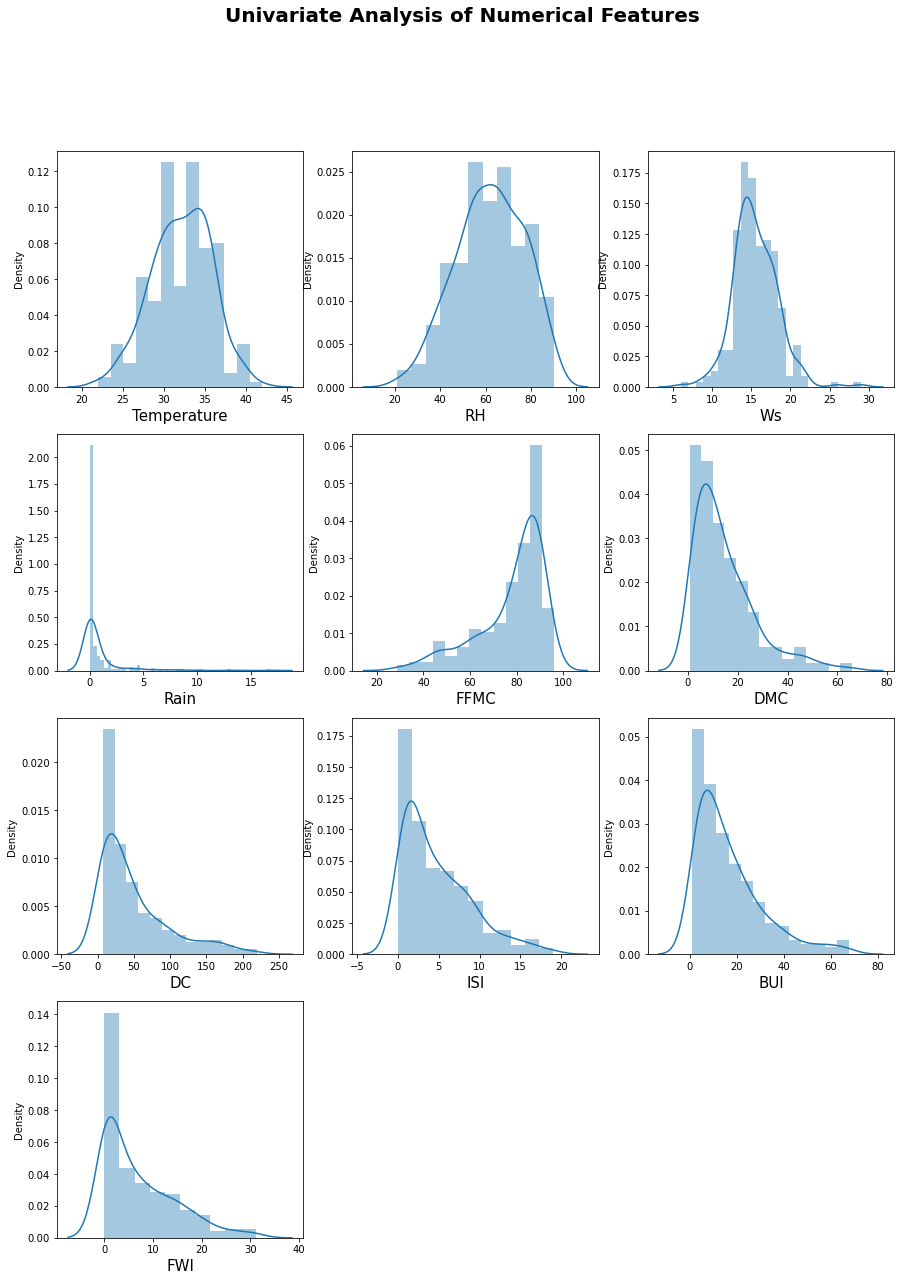

In [18]:
plt.figure(figsize=(15,20), facecolor='white')
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold')
plotnumber = 1

for column in alg:
    if plotnumber<=10 : # 11 columns not considering date column
        ax = plt.subplot(4,3,plotnumber)  # 4 rows, 3 columns
        sns.distplot(alg[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1

plt.show()

As can be seen Temperature which is our dependent variable shows normal distribution.
Rain, DMC, DC, ISI, BUI,FWI show right skewed distribution.
FFMC shows left skewed distribution.
Ws is slightly Right Skewed.
RH is slightly Left skewed.

# Detecting Outliers via Box-Plot

<AxesSubplot:xlabel='Rain'>

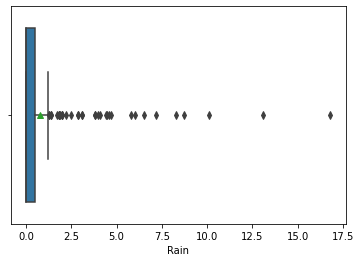

In [19]:
# Rain as an independent variable showcases a huge number of outliers on the right side.
sns.boxplot(x='Rain',data= alg,showmeans=True)

<AxesSubplot:xlabel='FFMC'>

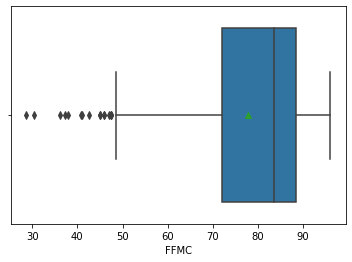

In [20]:
#FFMC is a numerical rating of the moisture content of litter and cured fine fuels. 
#It shows presence of outliers on the left side. 
sns.boxplot(x='FFMC',data= alg,showmeans=True)

<AxesSubplot:xlabel='BUI'>

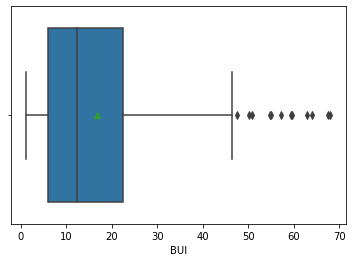

In [21]:
#The Build Up Index (BUI) which is a numeric rating of the total amount of fuel available for combustion.
#It shows presence of ouliers on the right hand side.
sns.boxplot(x='BUI',data= alg,showmeans=True)

# Bi-Variate Analysis

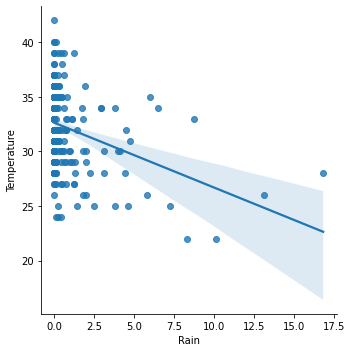

In [22]:
# We see an inversely proportional relationship.
#With increase in rainfall, the temperature decreases.
sns.lmplot(data=alg, x='Rain', y='Temperature') 

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

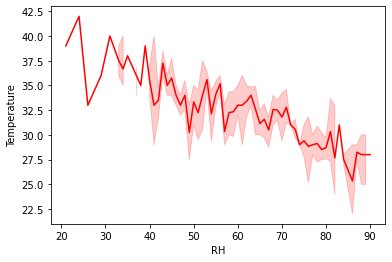

In [23]:
#The temperature will drop with an increase in relative humidity.
sns.lineplot(x='RH', y='Temperature', data=alg, color='red')

In [24]:
#To see which month temperature was the highest we extract the month from the date column.
alg['Month']=alg['Date'].dt.month_name()
alg

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Date,Region,Month
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01,Bejaia,June
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,2012-06-02,Bejaia,June
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03,Bejaia,June
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,2012-06-04,Bejaia,June
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,2012-06-05,Bejaia,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,30.0,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,2012-09-26,Sidi-Bel Abbes,September
242,28.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,2012-09-27,Sidi-Bel Abbes,September
243,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,2012-09-28,Sidi-Bel Abbes,September
244,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,2012-09-29,Sidi-Bel Abbes,September


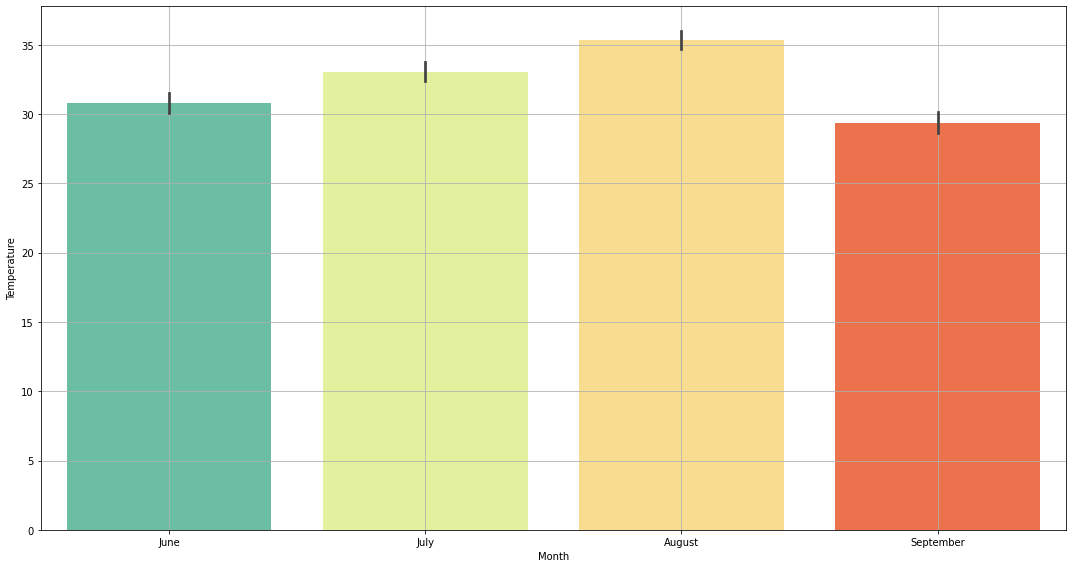

In [25]:
#As can be seen the temperature was the highest in the month of August.
plt.figure(figsize=(15,8))
sns.barplot(x='Month',y='Temperature',data=alg,palette='Spectral_r',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

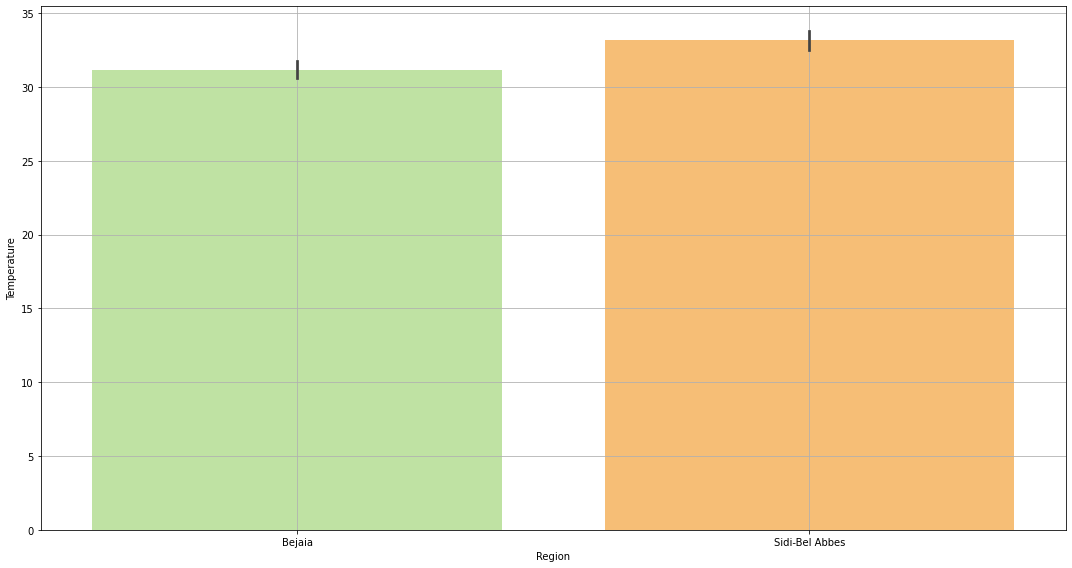

In [26]:
#The region of Sidi-Bel Abbes saw higher rise in tmeperature as compared to Bejaia.
plt.figure(figsize=(15,8))
sns.barplot(x='Region',y='Temperature',data=alg,palette='Spectral_r',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

<Figure size 1008x576 with 0 Axes>

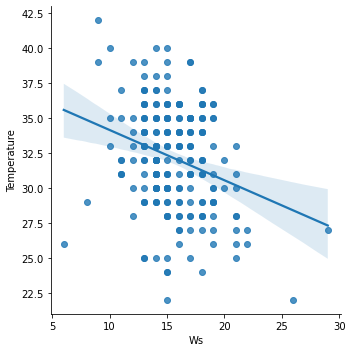

In [27]:
#With an increase in Wind speed,the air gets coolers and hence temperature decreases.
plt.figure(figsize=(14,8))
sns.lmplot(data=alg, x='Ws', y='Temperature')

<Figure size 1008x576 with 0 Axes>

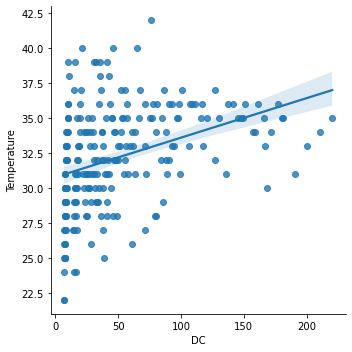

In [28]:
#A directly proportional relationship is exhibited as drier periods lead to higher temperatures.
plt.figure(figsize=(14,8))
sns.lmplot(data=alg, x='DC', y='Temperature')

Text(0, 0.5, 'Temperature')

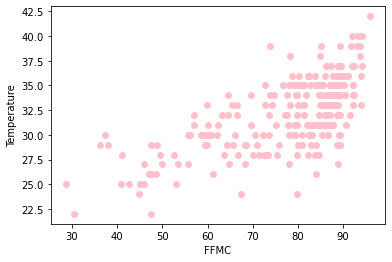

In [29]:
#Fine fuel moisture code is very sensitive to temperature and they exhibit a directly proportional relation between them.
plt.scatter(alg['FFMC'],alg['Temperature'],c='pink')
plt.xlabel("FFMC")
plt.ylabel("Temperature")

DMC, BUI, ISI AND FWI show positive correlation to Temperature.

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

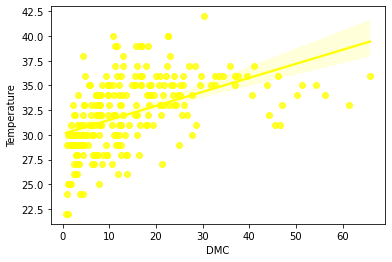

In [30]:
sns.regplot(x='DMC' ,y='Temperature' , data = alg,color ='yellow')

<AxesSubplot:xlabel='BUI', ylabel='Temperature'>

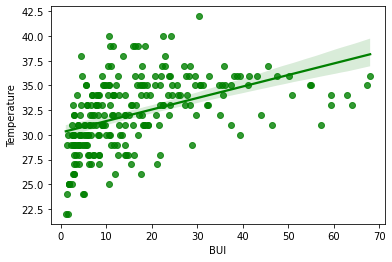

In [31]:
sns.regplot(x='BUI' ,y='Temperature' , data = alg,color ='green')

<AxesSubplot:xlabel='ISI', ylabel='Temperature'>

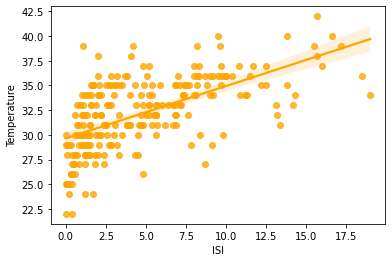

In [32]:
sns.regplot(x='ISI' ,y='Temperature' , data = alg,color ='orange')

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

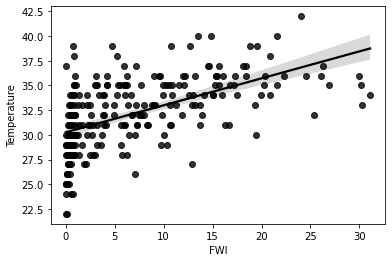

In [33]:
sns.regplot(x='FWI' ,y='Temperature' , data = alg,color ='black')

# Co-rrelation Heatmap

<AxesSubplot:>

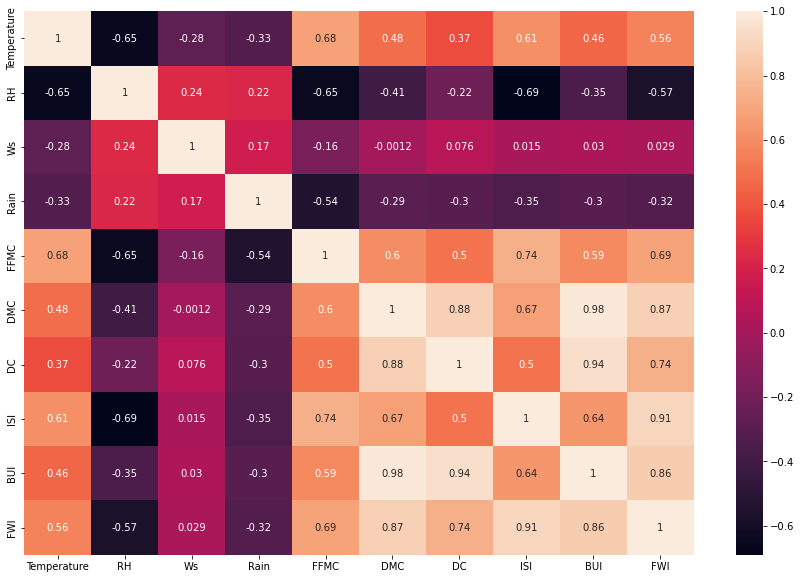

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(alg.corr(),annot=True)

Wind Speed(WS), Rain, Relative Humidity(RS) are negatively correlated to Temperature.

FFMC,DMC, BUI, ISI AND FWI show positive correlation to Temperature.

DMC & DC show very high correlation to BUI around 98 per cent & 94 per cent so in this case any one of the two can be taken as a feature for recognition of temperature.


# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Keeping the target variable in y, while the predictor variables are in x.
x = alg.drop(['Temperature','Month','Date','DMC'],axis=1)
y = alg['Temperature']
x

,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Region
0,57,18,0.0,65.7,7.6,1.3,3.4,0.5,Bejaia
1,61,13,1.3,64.4,7.6,1.0,3.9,0.4,Bejaia
2,82,22,13.1,47.1,7.1,0.3,2.7,0.1,Bejaia
3,89,13,2.5,28.6,6.9,0.0,1.7,0.0,Bejaia
4,77,16,0.0,64.8,14.2,1.2,3.9,0.5,Bejaia
...,...,...,...,...,...,...,...,...,...
241,65,14,0.0,85.4,44.5,4.5,16.9,6.5,Sidi-Bel Abbes
242,87,15,4.4,41.1,8.0,0.1,6.2,0.0,Sidi-Bel Abbes
243,87,29,0.5,45.9,7.9,0.4,3.4,0.2,Sidi-Bel Abbes
244,54,18,0.1,79.7,15.2,1.7,5.1,0.7,Sidi-Bel Abbes


In [37]:
#we use test values after the model is trained, it shud not be exposed to the values of trained features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [38]:
x_train.shape

(163, 9)

In [39]:
y_train.shape

(163,)

In [40]:
x_test.shape

(81, 9)

# Encoding

In [41]:
#encoding the regions with numbers 0 & 1 for my train dataset.
x_train['Region'] = x_train['Region'].map({'Bejaia':0, 'Sidi-Bel Abbes':1})
x_train.head()

,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Region
114,54,11,0.5,73.7,30.4,1.2,9.6,0.7,0
65,65,13,0.0,86.8,29.7,5.2,11.5,6.1,0
134,42,21,0.0,90.6,30.5,13.4,18.0,16.7,1
209,40,18,0.0,92.1,157.5,14.3,59.5,31.1,1
164,56,15,2.9,74.8,9.5,1.6,6.8,0.8,1


In [42]:
#encoding the regions with numbers 0 & 1 for my test dataset.
x_test['Region'] = x_test['Region'].map({'Bejaia':0, 'Sidi-Bel Abbes':1})
x_test.head()

,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Region
24,64,15,0.0,86.7,63.8,5.7,18.3,8.4,0
6,54,13,0.0,88.2,30.5,6.4,10.9,7.2,0
155,48,16,0.0,87.6,17.8,6.8,7.8,6.4,1
213,53,17,0.5,80.2,149.2,2.7,30.6,5.9,1
200,41,10,0.1,92.0,65.1,9.5,24.2,14.8,1


In [43]:
x_train

,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Region
114,54,11,0.5,73.7,30.4,1.2,9.6,0.7,0
65,65,13,0.0,86.8,29.7,5.2,11.5,6.1,0
134,42,21,0.0,90.6,30.5,13.4,18.0,16.7,1
209,40,18,0.0,92.1,157.5,14.3,59.5,31.1,1
164,56,15,2.9,74.8,9.5,1.6,6.8,0.8,1
...,...,...,...,...,...,...,...,...,...
106,82,15,0.4,44.9,7.3,0.2,1.4,0.0,0
14,80,17,3.1,49.4,7.4,0.4,3.0,0.1,0
92,76,17,7.2,46.0,7.5,0.2,1.8,0.1,0
181,57,16,0.0,87.5,37.6,6.7,15.7,9.0,1


# Scaling

In [44]:
#STANDARDISE or feature scaling MY DATA only on independent variables
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler

StandardScaler()

In [45]:
#train independent variables
x_train = scaler.fit_transform(x_train)
x_train   

array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.47763563,
        -0.8196431 , -0.99388373],
       [ 0.14460201, -0.93856657, -0.39436188, ..., -0.3471914 ,
        -0.08219052, -0.99388373],
       [-1.41768313,  2.04653297, -0.39436188, ...,  0.09906517,
         1.36540157,  1.0061539 ],
       ...,
       [ 0.89178186,  0.5539832 ,  2.82864022, ..., -1.01314351,
        -0.90158227, -0.99388373],
       [-0.39880152,  0.18084575, -0.39436188, ..., -0.058841  ,
         0.31384882,  1.0061539 ],
       [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.9719506 ,
        -0.87426921, -0.99388373]])

In [46]:
##TEST independent variables
#only transform in test to avoid data leakage 
#(only techniques shud be known about train data, not the features and data shud not be leaked to test data)
x_test = scaler.transform(x_test)
x_test

array([[ 7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
         6.76854493e-01,  3.01184828e-01,  2.81509163e-01,
         1.19661624e-01,  2.31909648e-01, -9.93883735e-01],
       [-6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
         7.79312965e-01, -3.74297004e-01,  4.49765818e-01,
        -3.88384315e-01,  6.80312985e-02, -9.93883735e-01],
       [-1.01013048e+00,  1.80845755e-01, -3.94361879e-01,
         7.38329576e-01, -6.31913198e-01,  5.45912478e-01,
        -6.01214370e-01, -4.12209346e-02,  1.00615390e+00],
       [-6.70503279e-01,  5.53983197e-01, -1.70542289e-01,
         2.32867782e-01,  2.03350160e+00, -4.39590788e-01,
         9.64116361e-01, -1.09503580e-01,  1.00615390e+00],
       [-1.48560857e+00, -2.05797890e+00, -3.49597961e-01,
         1.03887443e+00,  3.27554990e-01,  1.19490243e+00,
         5.24725278e-01,  1.10592751e+00,  1.00615390e+00],
       [ 7.66765714e-02, -2.43111635e+00,  1.42805137e-01,
        -2.04288364e-01, -6.70454203e-01, -8.241774

# Model Building

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [48]:
l= LinearRegression()
l

LinearRegression()

In [49]:
l.fit(x_train,y_train)

LinearRegression()

In [50]:
#1 unit increase in Relative humidity(x-value) decreases temperature(y-value) by 1.13.
#1 unit increase in Wind Speed(x-value) decreases temperature(y-value) by 0.46.

print(l.coef_)

#y = mx+c (m = slope, c= intercept)
#y = - 1.13 RH - 0.46 Ws + 0.098 Rain + 1.65 FFMC + 0.36 DC + 0.13 ISI + 0.01 BUI - 0.06 FWI + 0.04 Region + 31.98(Intercept)

[-1.1368636  -0.4685122   0.09815948  1.65634219  0.36780094  0.13132539
  0.01147392 -0.06949529  0.04345327]


In [51]:
print(l.intercept_)

31.98159509202454


The coefficient value represents the mean change in the response given a one unit change in the predictor. 
A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. 

## Prediction of Train Data

In [52]:
x_train_pred= l.predict(x_train)
x_train_pred

array([32.85438898, 33.18672977, 34.25044138, 35.97100027, 32.17102497,
       27.6493854 , 26.01932482, 33.25021599, 34.15323087, 31.04814401,
       33.02920618, 32.24409471, 25.00577826, 34.50067677, 30.02643454,
       29.61431068, 30.38581353, 36.98922849, 32.28794048, 31.01101805,
       34.10780253, 28.93899378, 34.12178978, 31.59535139, 33.91877532,
       34.16425262, 34.02246105, 32.94148419, 36.73194839, 30.3019825 ,
       26.11136027, 34.1994327 , 32.16635672, 28.22906723, 26.51645856,
       33.15820558, 31.32246962, 31.59354239, 34.58580059, 33.68464462,
       32.73592281, 30.02468298, 31.66137384, 33.432383  , 33.44874753,
       32.03389584, 33.27801628, 34.80892157, 28.54125581, 30.80474914,
       31.74807274, 34.49910696, 35.50567812, 29.05183656, 29.39922981,
       28.23334889, 29.30570628, 34.78965159, 29.44551859, 32.94385003,
       27.65534667, 34.06970786, 32.6494673 , 36.366699  , 34.32544427,
       35.80635351, 32.58073337, 27.86873343, 30.15965524, 31.38

# Prediction of Test Data

In [53]:
x_test_pred = l.predict(x_test)
x_test_pred

array([33.15672181, 34.22749962, 34.10842426, 33.60587359, 36.57141347,
       32.4508687 , 35.32035719, 27.44820528, 30.7927293 , 29.53034812,
       29.21037243, 33.36617223, 33.69513107, 33.24529521, 34.28983294,
       32.24353488, 36.70399876, 25.34962811, 32.26005016, 33.72132516,
       30.60025903, 28.36072716, 35.12660756, 28.66716654, 36.32957455,
       26.85685258, 32.90548149, 33.42083423, 33.18661375, 34.60094234,
       34.62361828, 31.58383618, 32.71654956, 33.45816722, 32.51051708,
       33.1628788 , 30.16819685, 34.56666651, 31.75532001, 23.90774072,
       33.90188492, 34.06146935, 32.33559601, 24.95756031, 36.067844  ,
       32.4563782 , 31.16034824, 30.32298436, 35.47202018, 34.74616201,
       36.60924589, 31.12965872, 30.92840879, 34.39368992, 33.92402414,
       32.34405253, 36.57762112, 32.27764514, 30.185541  , 36.58276322,
       33.18319994, 29.89291631, 33.92319488, 32.20532995, 31.68412791,
       24.89926012, 33.24498435, 30.63178365, 36.5467352 , 34.98

# R2 Accuracy of Train & Test Data

In [54]:
#train data
train_r2Score=metrics.r2_score(y_train,x_train_pred)
print(train_r2Score)

0.5747484869842483


In [55]:
#test data
test_r2Score=metrics.r2_score(y_test,x_test_pred)
print(test_r2Score)


0.5257797487070512


# Adjusted R2 of Train & Test Data

In [56]:
#train data
1- (1-train_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5208433656160544

In [57]:
#test data
1- (1-test_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4656673224868183

# Evaluation Metrics -> MSE, MAE, RMSE

In [58]:
# Train data
print(mean_squared_error(y_train, x_train_pred))
print(mean_absolute_error(y_train, x_train_pred))
print(np.sqrt(mean_squared_error(y_train, x_train_pred)))

6.055124426777113
1.999915436252755
2.4607162426369102


In [59]:
# Test data
print(mean_squared_error(y_test, x_test_pred))
print(mean_absolute_error(y_test, x_test_pred))
print(np.sqrt(mean_squared_error(y_test, x_test_pred)))

5.093476773146487
1.8037274811336452
2.256873229303429


# Assumptions of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

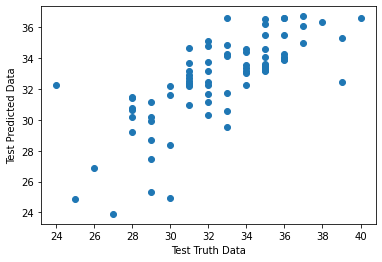

In [60]:
# Relation between actual and predicted data shows linearity.
plt.scatter(y_test, x_test_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

# Residuals

In [61]:
residuals = y_test-x_test_pred
residuals

24    -2.156722
6     -1.227500
155   -1.108424
213    1.394126
200    3.428587
         ...   
182    0.479654
5     -1.290666
56     0.479340
127   -2.181190
150    1.902382
Name: Temperature, Length: 81, dtype: float64

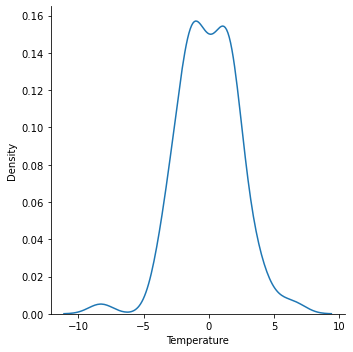

In [62]:
# Here one can see a slightly left skewed distribution but approx normal distribution.
sns.displot(residuals, kind = 'kde')

# Scatterplot with prediction and residual

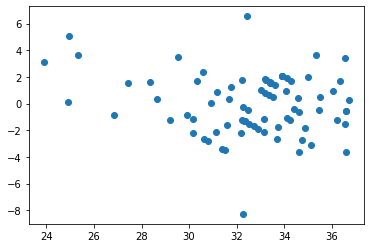

In [63]:
# The linear regression model is homoscedastic in nature.
plt.scatter(x_test_pred, residuals)

# Lasso (L1 Regularization) -> to reduce the features which are not important as using Lasso makes the coefficients which are not highly correlated  to zero.

In [64]:
from sklearn.linear_model import Lasso

In [65]:
lg = Lasso()
lg

Lasso()

In [66]:
lg.fit(x_train, y_train)

Lasso()

In [67]:
#The features whihc are not important have become 0 due to L1 regularization.
lg.coef_

array([-0.62324302, -0.        , -0.        ,  1.25581509,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

# Predict Train Data

In [68]:
lg_train_pred = lg.predict(x_train)
lg_train_pred

array([32.09202119, 32.75005491, 34.04969942, 34.26303643, 32.10171026,
       29.65897925, 28.78903094, 32.85187888, 32.92019102, 31.64381368,
       32.62996394, 32.12966634, 27.03166719, 33.45948923, 31.00793599,
       30.83304401, 30.76108715, 35.14458485, 32.353248  , 31.32309696,
       33.37759899, 30.02727451, 33.43875562, 31.92324053, 33.44677797,
       32.97252542, 33.20135156, 32.57127391, 34.82417939, 31.27878491,
       28.62493919, 33.51484581, 32.19526757, 29.60862284, 28.43900268,
       32.96283634, 31.63381334, 31.32889701, 33.14186165, 33.15790635,
       32.54498456, 31.02064724, 32.20908998, 32.82527825, 32.91050194,
       32.41384906, 32.61336366, 33.52700149, 29.97611822, 31.83252806,
       31.94650771, 33.37068778, 33.926275  , 30.35490243, 29.94840645,
       30.25141174, 30.17198811, 33.87289642, 30.4705488 , 32.41853796,
       29.29235072, 33.53613499, 32.57682966, 34.61997589, 33.35353193,
       34.05883292, 32.42631601, 29.87620528, 30.583173  , 31.79

# Predict Test Data

In [69]:
lg_test_pred = lg.predict(x_test)
lg_test_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

# R2 of Train & Test Data

In [70]:
#train data
train_r2Score=metrics.r2_score(y_train,lg_train_pred)
print(train_r2Score)

0.4725991286746958


In [71]:
#test data
test_r2Score=metrics.r2_score(y_test,lg_test_pred)
print(test_r2Score)

0.4334228064508907


# Adjusted R2 of Train & Test Data

In [72]:
#train data
1- (1-train_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4057454970982487

In [73]:
#test data
1- (1-test_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.36160316219818667

# Evaluation Metrics -> MSE, MAE, RMSE

In [74]:
#train data
print(mean_squared_error(y_train, lg_train_pred))
print(mean_absolute_error(y_train, lg_train_pred))
print(np.sqrt(mean_squared_error(y_train, lg_train_pred)))

7.509621484984801
2.237802562526517
2.740368859293362


In [75]:
#test data
print(mean_squared_error(y_test, lg_test_pred))
print(mean_absolute_error(y_test, lg_test_pred))
print(np.sqrt(mean_squared_error(y_test, lg_test_pred)))

6.085458745527471
1.9978776414662665
2.4668722596696147


# Ridge(L2 Regularization) -> to correct the problem of overfitting
# If we find that our training r2 accuracy is great but our testing accuracy is bad after linear regression ,that is called overfitting whihc has to be checked and accordingly if it is the case, then Ridge Regression is applied. 





In [76]:
from sklearn.linear_model import Ridge

In [77]:
rg = Ridge()
rg

Ridge()

In [78]:
rg.fit(x_train, y_train)

Ridge()

# Predict Train Data

In [79]:
rg_train_pred = rg.predict(x_train)
rg_train_pred

array([32.8424147 , 33.17456966, 34.26321395, 36.00484722, 32.15102477,
       27.67551774, 26.06271777, 33.23687221, 34.1328389 , 31.0414761 ,
       33.01977272, 32.23112326, 25.02909396, 34.48501724, 30.02965364,
       29.61865329, 30.37391335, 36.9875226 , 32.2601733 , 31.00846174,
       34.08729394, 28.95843166, 34.10851608, 31.58981104, 33.91680996,
       34.15618859, 34.00555839, 32.92442497, 36.74274733, 30.31160694,
       26.09202142, 34.18101628, 32.15445653, 28.25393003, 26.56493243,
       33.15616142, 31.32511734, 31.56933207, 34.59002064, 33.69173186,
       32.70755168, 30.02201168, 31.6505292 , 33.41487799, 33.43072484,
       32.01674522, 33.26094754, 34.78585136, 28.56131132, 30.80122022,
       31.74292962, 34.49490253, 35.48759629, 29.06691689, 29.4189981 ,
       28.25016345, 29.32589367, 34.8263436 , 29.43855946, 32.92891749,
       27.69347998, 34.05023451, 32.63297427, 36.35799681, 34.31566068,
       35.82342535, 32.56785803, 27.89395963, 30.13666884, 31.38

# Predict Test Data

In [80]:
rg_test_pred = rg.predict(x_test)
rg_test_pred

array([33.14323632, 34.21070089, 34.09114032, 33.56752416, 36.55948313,
       32.44703296, 35.3076495 , 27.48005814, 30.79183628, 29.54100049,
       29.21367382, 33.34834685, 33.67458945, 33.23456146, 34.29011571,
       32.23956057, 36.72298056, 25.41550996, 32.25347595, 33.70356924,
       30.59274379, 28.37900273, 35.10563804, 28.68470192, 36.34282503,
       26.89551084, 32.89034871, 33.40881561, 33.1463464 , 34.60056851,
       34.60730493, 31.56649824, 32.71013796, 33.45368404, 32.49394364,
       33.14867545, 30.15825167, 34.54714238, 31.71561639, 23.96321043,
       33.87689335, 34.0386132 , 32.32190296, 25.02157099, 36.06252526,
       32.45059419, 31.16972572, 30.33240556, 35.45617094, 34.73164298,
       36.64139762, 31.11548131, 30.9399561 , 34.39903892, 33.91079977,
       32.34925617, 36.61483462, 32.25776434, 30.18474194, 36.57208928,
       33.17705243, 29.89901477, 33.92476017, 32.19217191, 31.67545554,
       24.9363717 , 33.23578952, 30.63114085, 36.56706518, 34.97

# R2 of Train & Test Data

In [81]:
#train data
train_r2Score=metrics.r2_score(y_train,rg_train_pred)
print(train_r2Score)

0.5747228515616488


In [82]:
#test data
test_r2Score = metrics.r2_score(y_test, rg_test_pred)
print(test_r2Score)

0.5280041433522136


# Adjusted R2 of Train & Test Data

In [83]:
#Train data
1- (1-train_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5208144806328436

In [84]:
#Test data
1- (1-test_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4681736826503815

# Evaluation Metrics -> MSE, MAE, RMSE

In [85]:
#train data
print(mean_squared_error(y_train, rg_train_pred))
print(mean_absolute_error(y_train, rg_train_pred))
print(np.sqrt(mean_squared_error(y_train, rg_train_pred)))

6.055489447638467
2.0000146210577543
2.460790411156234


In [86]:
#test data
print(mean_squared_error(y_test, rg_test_pred))
print(mean_absolute_error(y_test, rg_test_pred))
print(np.sqrt(mean_squared_error(y_test, rg_test_pred)))

5.069585126957706
1.80073039416567
2.2515739221614965


# Elastic Net Regression -> a combination of Ridge and Lasso regularization.

In [87]:
from sklearn.linear_model import ElasticNet

In [88]:
e = ElasticNet()
e

ElasticNet()

In [89]:
e.fit(x_train, y_train)

ElasticNet()

# Prediction of test data

In [90]:
e_test_pred = e.predict(x_test)
e_test_pred

array([32.67538437, 33.2828665 , 33.39166189, 32.5343083 , 34.69997017,
       31.61596447, 34.19531003, 29.04204796, 30.78945991, 30.1535997 ,
       30.45648684, 32.29622407, 32.58344482, 32.16558706, 33.82604971,
       32.21918869, 35.62580683, 27.8892311 , 32.08953772, 32.9151641 ,
       31.11683708, 29.69497431, 33.70865116, 30.13638832, 35.41661253,
       28.88641486, 32.34616318, 32.83324149, 32.61166842, 34.18493417,
       33.30696124, 31.24118041, 32.69708255, 33.00996384, 32.19526592,
       32.45439198, 30.90564496, 33.21982445, 31.07163435, 27.96250937,
       32.75963389, 32.7754802 , 32.25119349, 27.83739844, 34.7121453 ,
       32.3610018 , 31.61061701, 30.76896815, 34.28964381, 33.58972224,
       35.50299464, 31.34199174, 31.49140792, 33.55731238, 33.65086963,
       32.1400052 , 36.08248899, 32.08098731, 30.87615492, 34.87532106,
       33.06823624, 30.83146556, 33.44890552, 31.90775064, 31.77386393,
       27.97773233, 32.98006409, 31.30618039, 35.29635917, 34.09

# R2 of Test data

In [91]:
test_r2Score = metrics.r2_score(y_test, e_test_pred)
print(test_r2Score)

0.49608021439053684


# Adjusted R2 of Test data

In [92]:
1- (1-test_r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4322030584682105

# Evaluation Metrics -> MSE, MAE, RMSE

In [93]:
#test data
print(mean_squared_error(y_test, e_test_pred))
print(mean_absolute_error(y_test, e_test_pred))
print(np.sqrt(mean_squared_error(y_test, e_test_pred)))

5.412471771360901
1.851245313107512
2.3264719580001176
